<a href="https://colab.research.google.com/github/OuhmadMohamed/DI_Bootcamp/blob/main/Week6/Day2/ExercisesXP_W6_D2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Exercises XP - Diabetes Classification

## What you will learn
- Understanding the problem
- Data collection
- Model training for classification
- Model evaluation

## What you will create
- A Logistic Regression model to predict diabetes



## Exercise 1 - Understanding the problem and Data Collection

We want to predict if an individual has diabetes.

- Load the diabetes dataset and explore it
- Count positive and negative cases
- Split the data into train and test


In [ ]:

# TODO: load the dataset
# If running on Colab, upload the zip or csv then adjust the path
import pandas as pd

df=pd.read_csv('diabetes_prediction_dataset.csv')

print(df.shape)
display(df.head())
print(df.dtypes)
print("Missing per column:")
display(df.isna().sum().sort_values(ascending=False))


(100000, 9)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object
Missing per column:


,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [ ]:
# Assume target column is named 'diabetes' with 0 or 1 values
assert 'diabetes' in df.columns, "Expected a 'diabetes' target column"
print(df['diabetes'].value_counts())


diabetes
0    91500
1     8500
Name: count, dtype: int64


In [ ]:

# TODO: train test split
from sklearn.model_selection import train_test_split
X = df.drop(columns=['diabetes'])
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)
print(X_train.shape, X_test.shape)


(70000, 8) (30000, 8)



## Exercise 2 - Model picking and standardization

- Which model can we use and why
- Do we need to standardize
- If yes, apply StandardScaler



> TODO: In a short paragraph, justify Logistic Regression for this binary task. Mention linear decision boundary, calibrated probabilities, and interpretability. Explain why standardization helps for numerical stability and better conditioning.


In [ ]:
# TODO: build a preprocessing pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()

preprocess = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])
print("Categorical:", cat_cols)
print("Numeric:", num_cols)


Categorical: ['gender', 'smoking_history']
Numeric: ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']


## Exercise 3 - Model training

In [ ]:

# TODO: train Logistic Regression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

clf = Pipeline([
    ('preprocess', preprocess),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
])
clf.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'hypertension',
                                                   'heart_disease', 'bmi',
                                                   'HbA1c_level',
                                                   'blood_glucose_level']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender',
                                                   'smoking_history'])])),
                ('lr', LogisticRegression(max_iter=1000, random_state=42))])


## Exercise 4 - Evaluation metrics

- Plot accuracy and comment
- Plot confusion matrix and comment
- Plot precision, recall, F1 and comment


Accuracy: 0.9594
Precision: 0.852
Recall: 0.6175
F1: 0.716


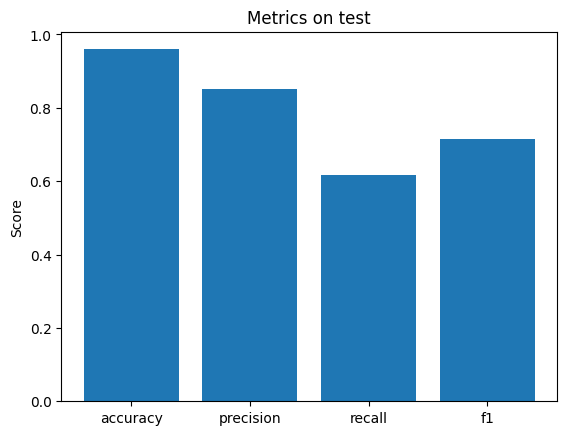

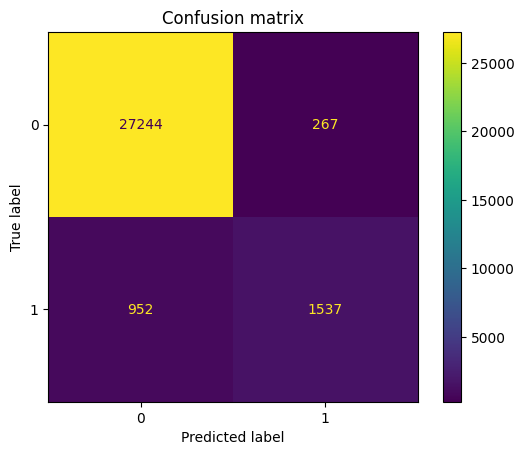

In [ ]:
# TODO: use the metrics functions properly to plot the scores
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", round(acc,4))
print("Precision:", round(prec,4))
print("Recall:", round(rec,4))
print("F1:", round(f1,4))

# Simple bar plot of metrics
import matplotlib.pyplot as plt
plt.figure()
plt.bar(['accuracy','precision','recall','f1'], [acc,prec,rec,f1])
plt.title('Metrics on test')
plt.ylabel('Score')
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Confusion matrix')
plt.show()


> TODO: comment on the balance between precision and recall.


## Exercise 5 - Visualizing the performance of our model

Visualize a 2D decision boundary with accuracy info. Use only two informative features for this plot to keep it 2D. Suggested pair: `HbA1c_level` and `blood_glucose_level` if present. Otherwise pick any two numeric features.


TypeError: unhashable type: 'dict'

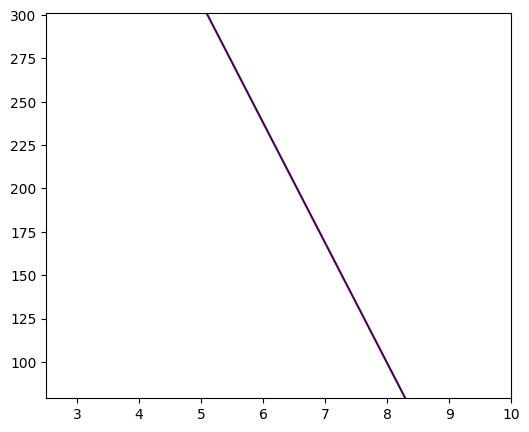

In [ ]:
# TODO: If these columns do not exist, change `feat_x` and `feat_y` below to two numeric features that exist in your data.
import numpy as np
import matplotlib.pyplot as plt

feat_x = 'HbA1c_level' if 'HbA1c_level' in X.columns else X.select_dtypes(include=['int64','float64']).columns[0]
feat_y = 'blood_glucose_level' if 'blood_glucose_level' in X.columns else X.select_dtypes(include=['int64','float64']).columns[1]

X2_train = X_train[[feat_x, feat_y]].copy()
X2_test = X_test[[feat_x, feat_y]].copy()

pipe2 = Pipeline([
    ('pre', ColumnTransformer([('num', StandardScaler(), [0,1])], remainder='drop')),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
])
pipe2.fit(X2_train.values, y_train)

# Mesh
x_min, x_max = X2_train[feat_x].min()-1, X2_train[feat_x].max()+1
y_min, y_max = X2_train[feat_y].min()-1, X2_train[feat_y].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
probs = pipe2.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1].reshape(xx.shape)

plt.figure(figsize=(6,5))
cs = plt.contour(xx, yy, probs, levels=[0.5])
plt.clabel(cs, inline=True, fmt={{0.5:'P=0.5'}})
plt.scatter(X2_test[feat_x], X2_test[feat_y], c=y_test, alpha=0.7)
plt.xlabel(feat_x); plt.ylabel(feat_y)
from sklearn.metrics import accuracy_score
acc2 = accuracy_score(y_test, pipe2.predict(X2_test.values))
plt.title(f'Decision boundary on 2 features - test accuracy {acc2:.3f}')
plt.show()



## Exercise 6 - ROC curve

Use the code template provided to plot the ROC curve for your model and compute AUC. You can reuse the fitted `clf` pipeline.

Template summary:
- Get predicted probabilities for the positive class
- Compute fpr and tpr with `roc_curve`
- Plot ROC and print AUC


In [ ]:

from sklearn import metrics
y_proba = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_proba)
auc = metrics.roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC={auc:.3f}')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('ROC curve')
plt.show()


> TODO: interpret the ROC curve and AUC from results of execution of cell above.